In [210]:
import pandas as pd
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt
import numpy as np

In [233]:
df=pd.read_excel('BPR Only .xlsx','Sheet1')

In [234]:
#df.head()

In [235]:
df['Account'].count()

117472

In [236]:
#df.shape

In [237]:
df.dropna(inplace=True)

In [238]:
#df.shape

In [240]:
#df['Account'].apply(pd.value_counts)

In [241]:
df=df[df.Account == (115806 or 928860) ]

In [242]:
df.shape

(3654, 19)

In [223]:
#df.head()

In [243]:
df.drop(columns=['    BusA','CCAr','Zone','Bran'],inplace=True)

In [244]:
#df.head(5)

In [245]:
df.drop(columns=['Reference','Account','DocumentNo','Doc/Chq dt','Year','Clrng doc.'],inplace=True)

In [246]:
#df.shape

In [247]:
df.drop(columns='Customer Name',inplace=True)

In [248]:
#df.shape

In [249]:
#df.head()

In [250]:
df['Status']=df['Status'].astype('category')

In [251]:
df["Status"] = df["Status"].cat.codes

In [252]:
#df.head()

In [253]:
#df['Status'].value_counts()

In [254]:
df['PayT'] = df['PayT'].map(lambda x: int(x.lstrip('ZZ')))


In [255]:
#df

In [256]:
df['Pstng Date']=df['Pstng Date'].dt.strftime("%Y%m%d").astype(str)
df['Net Due Dt']=df['Net Due Dt'].dt.strftime("%Y%m%d").astype(str)
df['Clearing']=df['Clearing'].dt.strftime("%Y%m%d").astype(str)

In [257]:
#df

In [258]:
df = df.reset_index()
df.drop(columns='index',inplace=True)
df.to_excel('Reduced.xlsx')

PermissionError: [Errno 13] Permission denied: 'Reduced.xlsx'

In [276]:
df['Arr (Clearing - Net Due Date)'].value_counts()

 0     2302
-1      660
-2      333
 2      112
 1      100
 3       90
-3       31
 4       13
 5       10
-4        2
 10       1
Name: Arr (Clearing - Net Due Date), dtype: int64

In [264]:
sums=0
arr=[]
for i in range(len(df)):
    if(df['Status'][i]==1):
        sums=df['  Local Crcy Amt'][i]
        arr.append(sums)
    else:
        arr.append(0)
    
df['Delay Amount']=arr

In [265]:
df['Delay Amount']

0       0.000000
1       0.000000
2       0.000000
3       0.000000
4       0.000000
5       0.000000
6       0.000000
7       0.000000
8       0.000000
9       0.000000
10      0.000000
11      0.000000
12      0.000000
13      0.000000
14      0.000000
15      0.000000
16      0.000000
17      0.000000
18      0.000000
19      0.000000
20      0.000000
21      0.000000
22      0.000000
23      0.000000
24      0.000000
25      0.000000
26      0.000000
27      0.158651
28      0.143911
29      0.136224
          ...   
3624    0.149750
3625    0.150504
3626    0.150667
3627    0.151493
3628    0.152742
3629    0.154740
3630    0.156213
3631    0.156780
3632    0.157949
3633    0.241375
3634    0.165301
3635    0.171330
3636    0.141827
3637    0.142035
3638    0.190018
3639    0.190351
3640    0.144564
3641    0.198283
3642    0.151423
3643    0.151866
3644    0.164303
3645    0.132634
3646    0.168795
3647    0.169221
3648    0.140275
3649    0.176805
3650    0.144564
3651    0.1533

In [261]:

############################   START FROM HERE   ###############################################

#df=pd.read_excel('Reduced.xlsx')

In [283]:
x='Pstng Date'
dict1={ '10':np.zeros([8]),'11':np.zeros([8]),'12':np.zeros([8])}
for j in range(len(dict1)):
    sums=0
    count=0
    sums_day=0
    sums_day_count=0
    sums_day_start=0
    sums_day_count_start=0
    for i in range(len(df)):
        if(df['Arr (Clearing - Net Due Date)'][i]>0):
            #if(df['Pstng Date'][i][:4]=='2018'):
                if(df[x][i][4:6]==list(dict1.keys())[j]):
                        count=count+1
                        dict1[df[x][i][4:6]][0]+=df['Delay Amount'][i]
                        dict1[df[x][i][4:6]][1]+=1
                        
                        if(int(df[x][i][6:])<=10):
                            dict1[df[x][i][4:6]][2]+=df['Delay Amount'][i]
                            dict1[df[x][i][4:6]][3]+=1
                            
                        if(int(df[x][i][6:])>10 and int(df[x][i][6:])<20):
                            dict1[df[x][i][4:6]][4]+=df['Delay Amount'][i]
                            dict1[df[x][i][4:6]][5]+=1
                        
                        if(int(df[x][i][6:])>=20):
                            dict1[df[x][i][4:6]][6]+=df['Delay Amount'][i]
                            dict1[df[x][i][4:6]][7]+=1



    
dict1

{'10': array([0.29894517, 2.        , 0.        , 0.        , 0.29894517,
        2.        , 0.        , 0.        ]),
 '11': array([ 23.69289603, 163.        ,   0.        ,   0.        ,
         11.08479925,  74.        ,  12.60809678,  89.        ]),
 '12': array([ 21.33161669, 159.        ,   8.96300402,  65.        ,
          5.03411287,  39.        ,   7.3344998 ,  55.        ])}

In [284]:
for key, value in dict1.items():
    for i in range(len(value)):
        if(i%2==0):
            if(value[i+1]!=0):
                value[i]=value[i]/value[i+1]
            
dict1
       

{'10': array([0.14947258, 2.        , 0.        , 0.        , 0.14947258,
        2.        , 0.        , 0.        ]),
 '11': array([1.45355190e-01, 1.63000000e+02, 0.00000000e+00, 0.00000000e+00,
        1.49794584e-01, 7.40000000e+01, 1.41664009e-01, 8.90000000e+01]),
 '12': array([1.34161111e-01, 1.59000000e+02, 1.37892369e-01, 6.50000000e+01,
        1.29079817e-01, 3.90000000e+01, 1.33354542e-01, 5.50000000e+01])}

In [285]:
for key,values in dict1.items():
    print(values)

[0.14947258 2.         0.         0.         0.14947258 2.
 0.         0.        ]
[1.45355190e-01 1.63000000e+02 0.00000000e+00 0.00000000e+00
 1.49794584e-01 7.40000000e+01 1.41664009e-01 8.90000000e+01]
[1.34161111e-01 1.59000000e+02 1.37892369e-01 6.50000000e+01
 1.29079817e-01 3.90000000e+01 1.33354542e-01 5.50000000e+01]


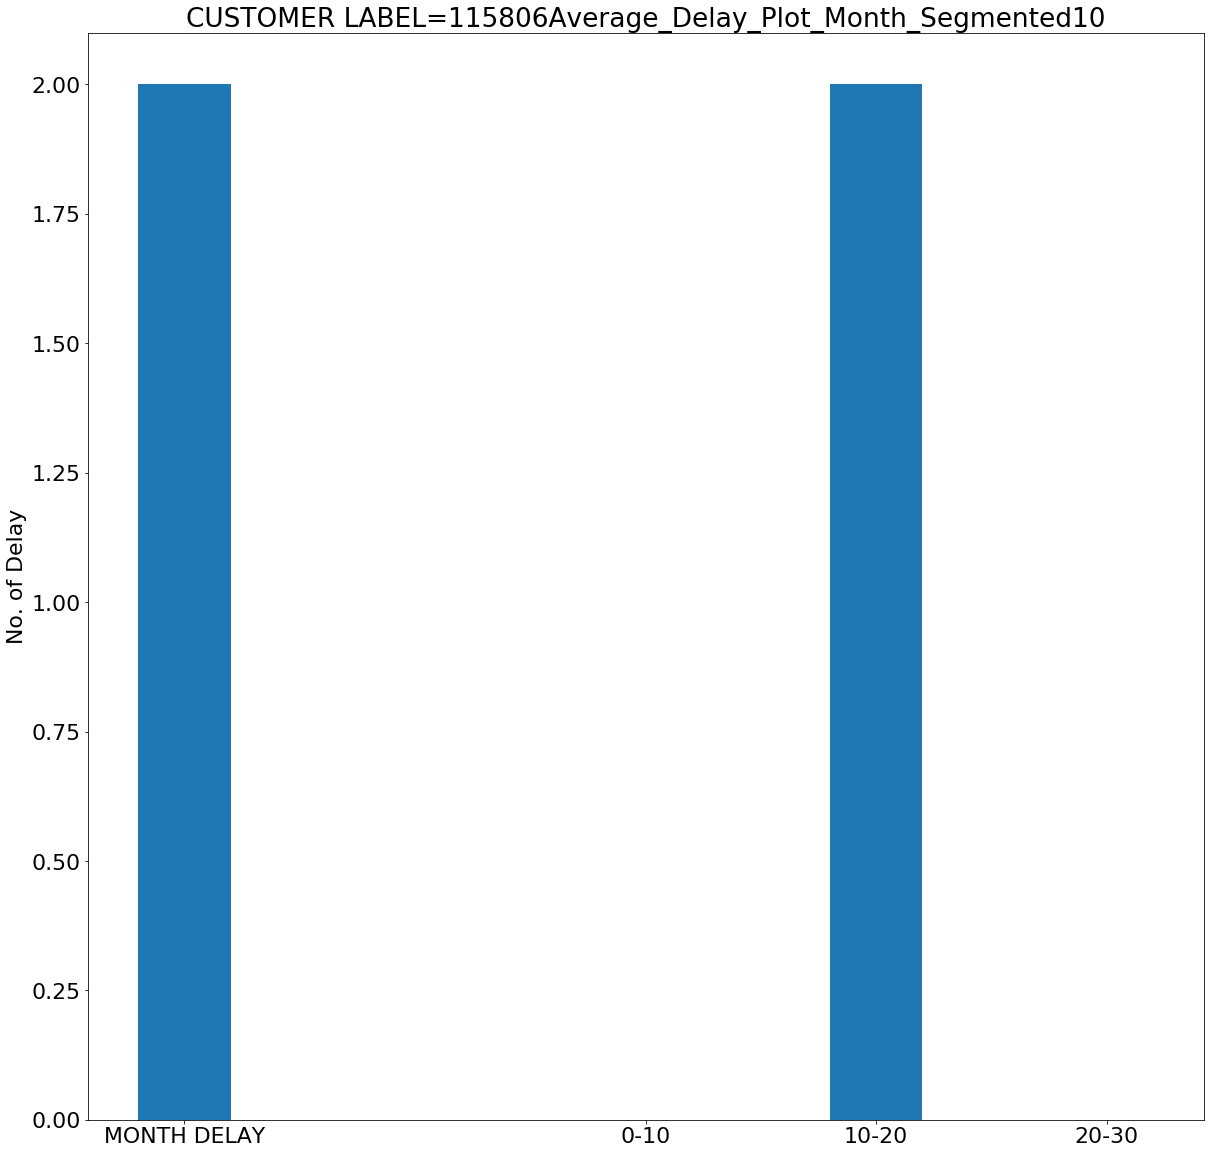

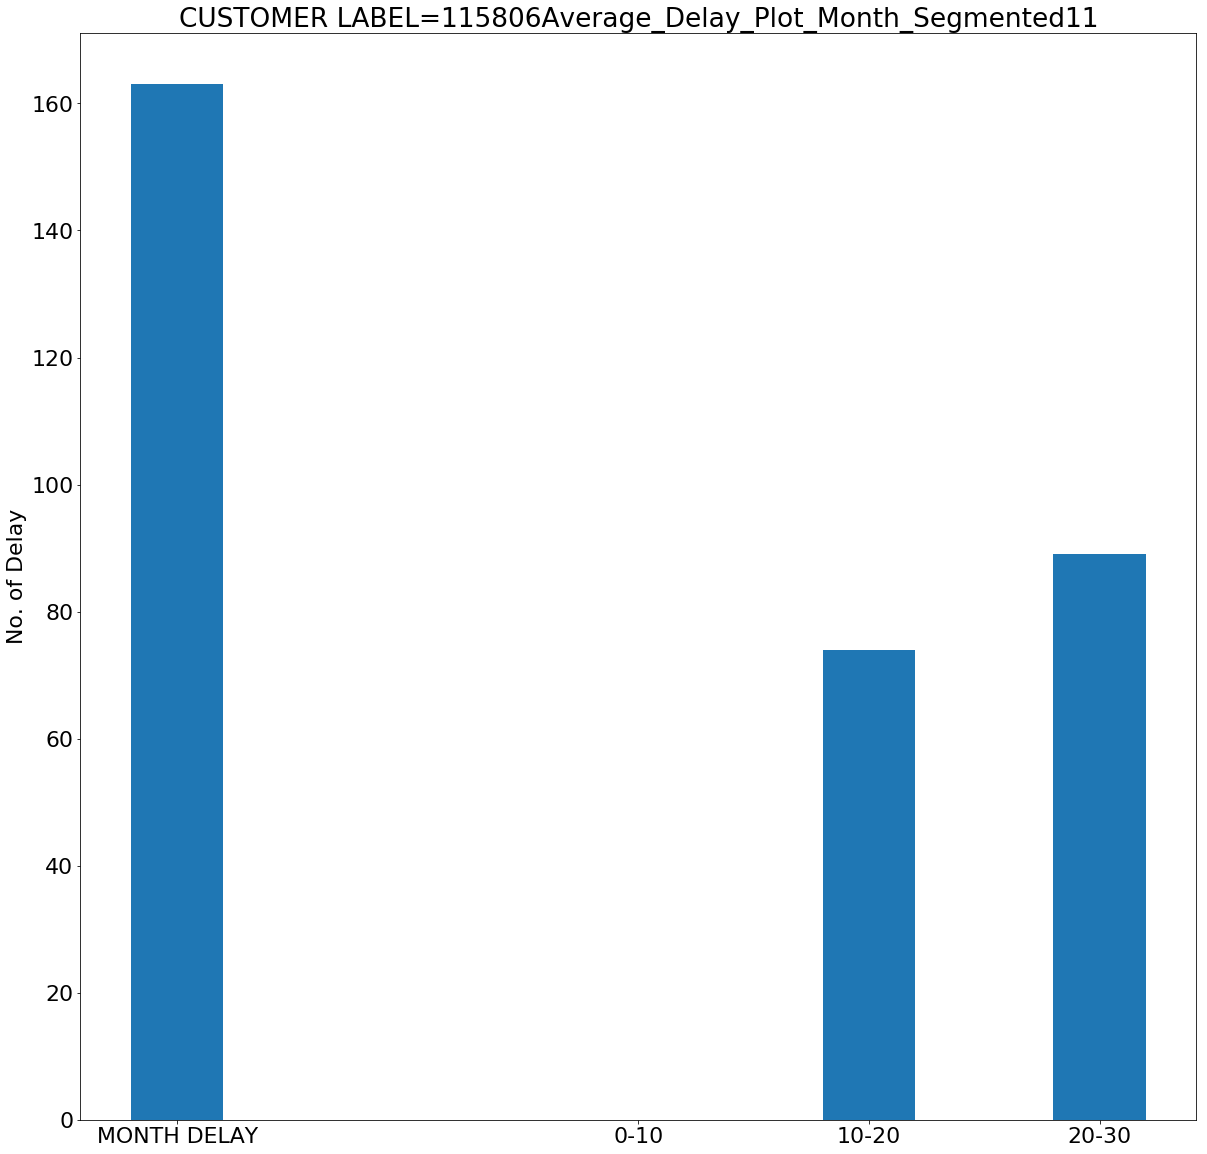

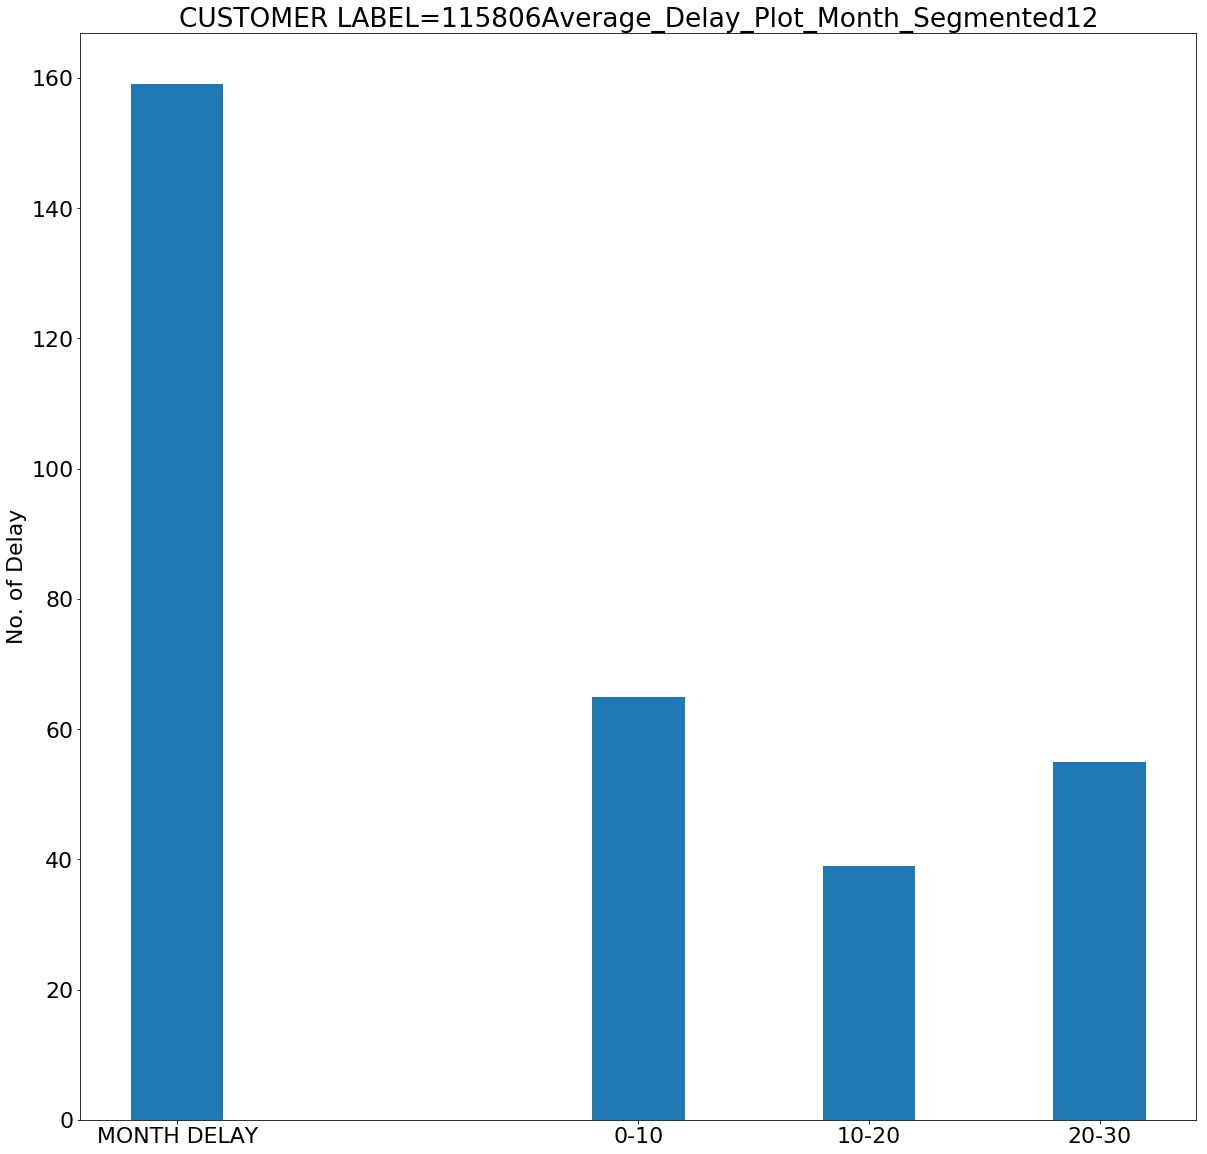

In [287]:
for key,values in dict1.items():
    
    fig = plt.figure(figsize=(20, 20))
    plt.rcParams.update({'font.size': 22})
    plt.bar([1, 5, 7,9],[values[1],values[3],values[5],values[7]], tick_label=['MONTH DELAY','0-10','10-20','20-30'])
    #plt.bar([1, 5, 7,9],[values[0],values[2],values[4],values[6]], tick_label=['Av MONTH DELAY','0-10','10-20','20-30'])
    ylabel('No. of Delay')
    #ylabel('Average Amount of Delay')
    plt.title('CUSTOMER LABEL=115806'+'Average_Delay_Plot_Month_Segmented{}'.format(key))
    #plt.savefig('Average_Delay_Plot_Month_segmented{}'.format(key)+'.png')
    plt.show()


In [ ]:
#Training Model

In [289]:
df.drop(columns='Clearing',inplace=True)


In [290]:
from sklearn.ensemble import RandomForestClassifier

C:\Users\soumy\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [305]:
#=np.array(df['Status'])
#f1=df.drop(columns='Status',inplace=True)
X=df
df.drop(columns='Month',inplace=True)


In [316]:
df

Local Crcy Amt  Arr (Clearing - Net Due Date)  PayT Pstng Date  \
0             0.154560                             -1    41   20180920   
1             0.162293                             -1    41   20180922   
2             0.174352                             -1    40   20180922   
3             0.161904                             -1    41   20180922   
4             0.171334                             -1    40   20180922   
5             0.133184                             -2    41   20180923   
6             0.148742                             -2    40   20180923   
7             0.153805                             -2    40   20180923   
8             0.185169                             -1    40   20180924   
9             0.147591                             -2    40   20180925   
10            0.146718                              0    40   20180925   
11            0.139723                             -1    41   20181022   
12            0.161092                             -1    41   20181022   
13            0.173585                              0    40   20181026   
14            0.167971                              0    41   20181026   
15            0.167742                              0    41   20181026   
16            0.165989                             -1    40   20181027   
17            0.162624                             -1    40   20181027   
18            0.160604                             -1    41   20181028   
19            0.161154                             -1    41   20181028   
20            0.166785                              0    40   20181029   
21            0.168009                             -1    40   20181030   
22            0.176085                             -1    40   20181030   
23            0.176085                             -2    40   20181031   
24            0.150692                             -1    41   20181121   
25            0.173014                             -1    41   20181121   
26            0.161085                             -1    41   20181121   
27            0.158651                              1    40   20181222   
28            0.143911                              1    40   20181222   
29            0.136224                              1    40   20181222   
...                ...                            ...   ...        ...   
3624          0.149750                              3    19   20181117   
3625          0.150504                              3    28   20181124   
3626          0.150667                              3    28   20181114   
3627          0.151493                              3    19   20181117   
3628          0.152742                              3     1   20181014   
3629          0.154740                              3    28   20181207   
3630          0.156213                              3    28   20181124   
3631          0.156780                              3    28   20181207   
3632          0.157949                              3    28   20181120   
3633          0.241375                              2    28   20181125   
3634          0.165301                              3    40   20181202   
3635          0.171330                              3    41   20181207   
3636          0.141827                              4    28   20181119   
3637          0.142035                              4    28   20181119   
3638          0.190018                              3    28   20181207   
3639          0.190351                              3    28   20181207   
3640          0.144564                              4    28   20181119   
3641          0.198283                              3    28   20181120   
3642          0.151423                              4    28   20181119   
3643          0.151866                              4    28   20181119   
3644          0.164303                              4    28   20181119   
3645          0.132634                              5    28   20181223   
3646        

In [306]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [309]:
model= RandomForestClassifier(n_jobs=3, random_state=0)

In [311]:
y1=model.fit(xtrain, ytrain)

In [313]:
y2=model.predict(xtest)

In [315]:
from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(ytest, y2))

Accuracy: 1.0


In [321]:
 pd.Series(model.feature_importances_,index=df.columns).sort_values(ascending=False)

Delay Amount                     0.352531
Sum of Delay                     0.349131
Arr (Clearing - Net Due Date)    0.200412
Pstng Date                       0.097111
PayT                             0.000410
Net Due Dt                       0.000406
  Local Crcy Amt                 0.000000
dtype: float64

In [ ]:
p